In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu, pearsonr, spearmanr

In [44]:
df1 = pd.read_csv('dataset1_clean.csv')
df2 = pd.read_csv('dataset2_clean.csv')

In [45]:
#Transform and Categorise Columns

#Transform 'seconds_after_rat_arrival' to 'vigilance'
df1['vigilance'] = df1['seconds_after_rat_arrival']

# Categorise vigilance levels
def vigilance_category(val):
    if val < 10:
        return 'Low'
    elif val < 30:
        return 'Medium'
    else:
        return 'High'

df1['vigilance_level'] = df1['vigilance'].apply(vigilance_category)

# Categorise hours_after_sunset
def night_period(val):
    if val < 3:
        return 'Early night'
    else:
        return 'Late night'

df1['night_period'] = df1['hours_after_sunset'].apply(night_period)
df2['night_period'] = df2['hours_after_sunset'].apply(night_period)

In [46]:
# --- Descriptive Statistics ---

desc_cols = ['vigilance', 'hours_after_sunset']
desc_stats = df1[desc_cols + ['risk', 'reward']].describe()
desc_stats.loc['range'] = desc_stats.loc['max'] - desc_stats.loc['min']
desc_stats.loc['variance'] = df1[desc_cols + ['risk', 'reward']].var()
desc_stats.loc['median'] = df1[desc_cols + ['risk', 'reward']].median()
desc_stats.loc['std'] = df1[desc_cols + ['risk', 'reward']].std()

print("Summary statistics for key variables (Dataset 1):")
print(desc_stats)

Summary statistics for key variables (Dataset 1):
             vigilance  hours_after_sunset        risk      reward
count       878.000000          878.000000  878.000000  878.000000
mean        280.593394            5.623992    0.506834    0.542141
std         237.702841            2.343495    0.500238    0.498505
min           0.000000            0.138611    0.000000    0.000000
25%          90.000000            3.826528    0.000000    0.000000
50%         205.000000            5.703333    1.000000    1.000000
75%         444.500000            7.445694    1.000000    1.000000
max         949.000000           12.091944    1.000000    1.000000
range       949.000000           11.953333    1.000000    1.000000
variance  56502.640640            5.491969    0.250238    0.248507
median      205.000000            5.703333    1.000000    1.000000


Summary statistics for selected variables:
             vigilance  hours_after_sunset        risk      reward
count       878.000000          878.000000  878.000000  878.000000
mean        280.593394            5.623992    0.506834    0.542141
std         237.702841            2.343495    0.500238    0.498505
min           0.000000            0.138611    0.000000    0.000000
25%          90.000000            3.826528    0.000000    0.000000
50%         205.000000            5.703333    1.000000    1.000000
75%         444.500000            7.445694    1.000000    1.000000
max         949.000000           12.091944    1.000000    1.000000
range       949.000000           11.953333    1.000000    1.000000
variance  56502.640640            5.491969    0.250238    0.248507
median      205.000000            5.703333    1.000000    1.000000
--------------------------------------------------
Proportion of Risk by Vigilance Level (%):
risk                   0        1  Difference(1-0)
vigilanc

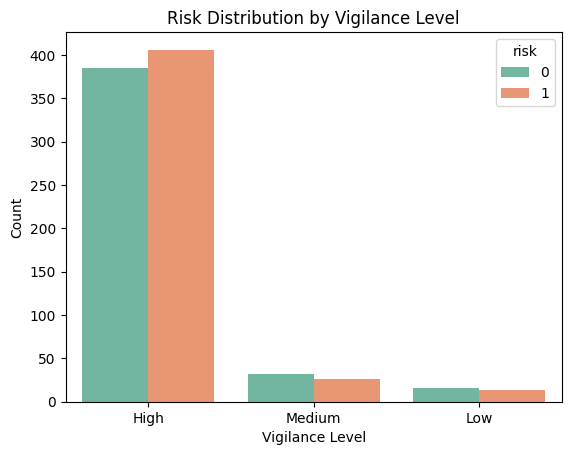

Proportion of Risk by Night Period (%):
risk                0        1  Difference(1-0)
night_period                                   
Early night   44.2623  55.7377          11.4754
Late night    50.1323  49.8677          -0.2646
--------------------------------------------------


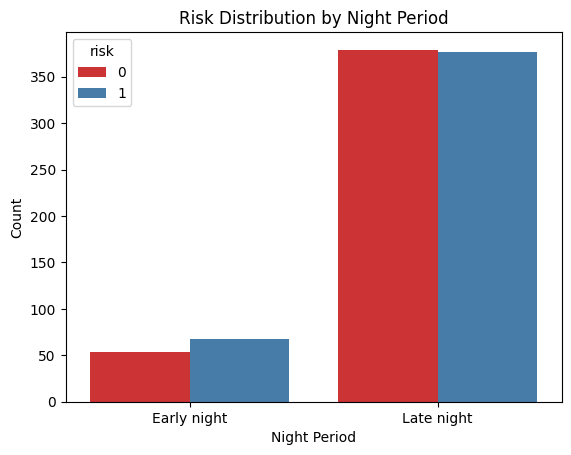

Proportion of Risk by Reward (%):
risk          0        1  Difference(1-0)
reward                                   
0       13.1841  86.8159          73.6318
1       79.8319  20.1681         -59.6639
--------------------------------------------------


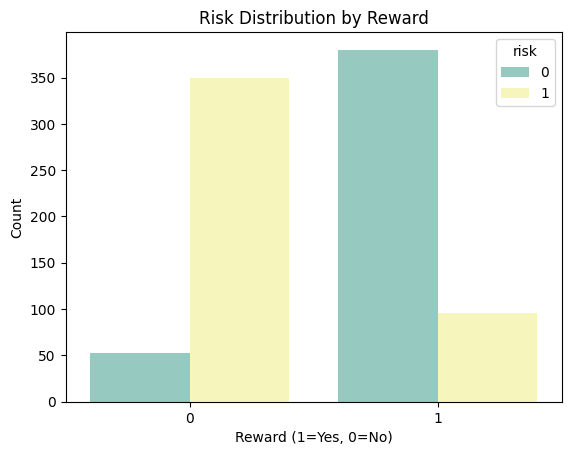

Proportion of Risk by Fight (%):
risk         0        1  Difference(1-0)
fight                                   
0      51.1269  48.8731          -2.2539
1       5.7143  94.2857          88.5714
--------------------------------------------------


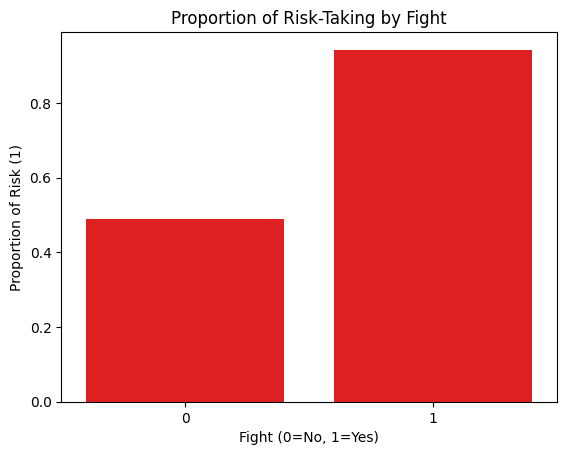

Proportion of Reward by Fight (%):
reward        0        1  Difference(1-0)
fight                                    
0       43.6536  56.3464          12.6928
1       97.1429   2.8571         -94.2857
--------------------------------------------------


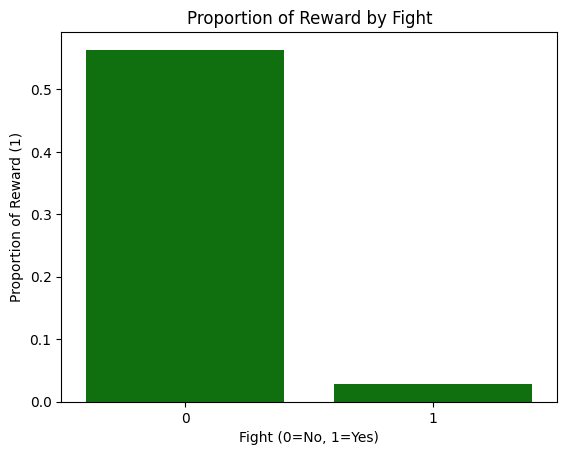

Proportion of Risk by Habit (%):
risk          0         1  Difference(1-0)
habit                                     
bat      0.0000  100.0000         100.0000
fast   100.0000    0.0000        -100.0000
other   88.3333   11.6667         -76.6667
pick    89.0323   10.9677         -78.0645
rat      0.0000  100.0000         100.0000
--------------------------------------------------


C:\Users\navod\AppData\Local\Temp\ipykernel_19664\3140129052.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=habit_risk_ct.index, y=habit_risk_ct[1].values, palette='viridis')


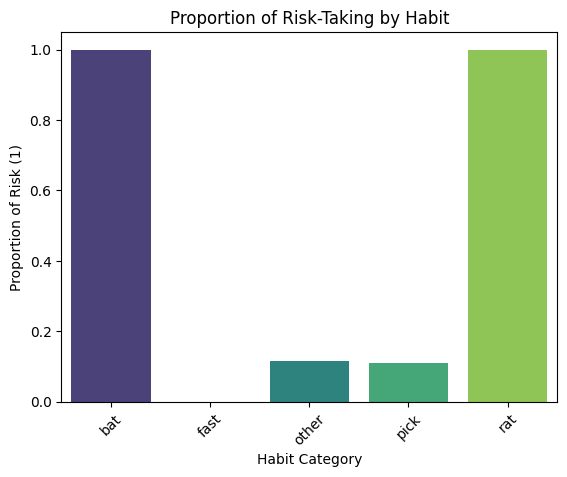

Proportion of Reward by Habit (%):
reward         0         1  Difference(1-0)
habit                                      
bat      64.0351   35.9649         -28.0702
fast      0.0000  100.0000         100.0000
other   100.0000    0.0000        -100.0000
pick      0.0000  100.0000         100.0000
rat      87.6221   12.3779         -75.2443
--------------------------------------------------


C:\Users\navod\AppData\Local\Temp\ipykernel_19664\3140129052.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=habit_reward_ct.index, y=habit_reward_ct[1].values, palette='mako')


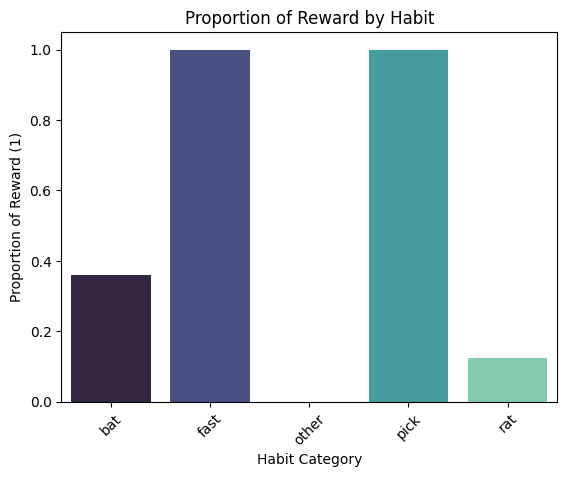

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Load the dataset
# ---------------------------------------------------
df = pd.read_csv("Dataset1_clean.csv")

# ---------------------------------------------------
# Data transformation and categorization
# ---------------------------------------------------
df['vigilance'] = df['seconds_after_rat_arrival']

# Categorize vigilance levels
def vigilance_category(val):
    if val < 10:
        return 'Low'
    elif val < 30:
        return 'Medium'
    else:
        return 'High'
df['vigilance_level'] = df['vigilance'].apply(vigilance_category)

# Categorize night period
def night_period(val):
    return 'Early night' if val < 3 else 'Late night'
df['night_period'] = df['hours_after_sunset'].apply(night_period)

# ---------------------------------------------------
# Descriptive statistics
# ---------------------------------------------------
desc_cols = ['vigilance', 'hours_after_sunset', 'risk', 'reward']
desc_stats = df[desc_cols].describe()
desc_stats.loc['range'] = desc_stats.loc['max'] - desc_stats.loc['min']
desc_stats.loc['variance'] = df[desc_cols].var()
desc_stats.loc['median'] = df[desc_cols].median()
desc_stats.loc['std'] = df[desc_cols].std()

print("Summary statistics for selected variables:")
print(desc_stats)
print("-" * 50)

# ---------------------------------------------------
# Helper function for printing crosstabs with differences
# ---------------------------------------------------
def print_with_difference(title, ct):
    print(title)
    ct_percent = ct * 100
    if 0 in ct_percent.columns and 1 in ct_percent.columns:
        ct_percent['Difference(1-0)'] = ct_percent[1] - ct_percent[0]
    print(ct_percent.round(4))
    print("-" * 50)

# ---------------------------------------------------
# Descriptive Analysis
# ---------------------------------------------------

# 1. Vigilance Level vs Risk
vig_risk_ct = pd.crosstab(df['vigilance_level'], df['risk'], normalize='index')
print_with_difference("Proportion of Risk by Vigilance Level (%):", vig_risk_ct)
sns.countplot(x='vigilance_level', hue='risk', data=df, palette='Set2')
plt.title('Risk Distribution by Vigilance Level')
plt.xlabel('Vigilance Level')
plt.ylabel('Count')
plt.show()

# 2. Night Period vs Risk
night_risk_ct = pd.crosstab(df['night_period'], df['risk'], normalize='index')
print_with_difference("Proportion of Risk by Night Period (%):", night_risk_ct)
sns.countplot(x='night_period', hue='risk', data=df, palette='Set1')
plt.title('Risk Distribution by Night Period')
plt.xlabel('Night Period')
plt.ylabel('Count')
plt.show()

# 3. Reward vs Risk
reward_risk_ct = pd.crosstab(df['reward'], df['risk'], normalize='index')
print_with_difference("Proportion of Risk by Reward (%):", reward_risk_ct)
sns.countplot(x='reward', hue='risk', data=df, palette='Set3')
plt.title('Risk Distribution by Reward')
plt.xlabel('Reward (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

# 4. Fight vs Risk
fight_risk_ct = pd.crosstab(df['fight'], df['risk'], normalize='index')
print_with_difference("Proportion of Risk by Fight (%):", fight_risk_ct)
sns.barplot(data=fight_risk_ct.reset_index(), x='fight', y=1, color='red')
plt.title("Proportion of Risk-Taking by Fight")
plt.xlabel("Fight (0=No, 1=Yes)")
plt.ylabel("Proportion of Risk (1)")
plt.show()

# 5. Fight vs Reward
fight_reward_ct = pd.crosstab(df['fight'], df['reward'], normalize='index')
print_with_difference("Proportion of Reward by Fight (%):", fight_reward_ct)
sns.barplot(data=fight_reward_ct.reset_index(), x='fight', y=1, color='green')
plt.title("Proportion of Reward by Fight")
plt.xlabel("Fight (0=No, 1=Yes)")
plt.ylabel("Proportion of Reward (1)")
plt.show()

# 6. Habit vs Risk
habit_risk_ct = pd.crosstab(df['habit'], df['risk'], normalize='index')
print_with_difference("Proportion of Risk by Habit (%):", habit_risk_ct)
sns.barplot(x=habit_risk_ct.index, y=habit_risk_ct[1].values, palette='viridis')
plt.title("Proportion of Risk-Taking by Habit")
plt.xlabel("Habit Category")
plt.ylabel("Proportion of Risk (1)")
plt.xticks(rotation=45)
plt.show()

# 7. Habit vs Reward
habit_reward_ct = pd.crosstab(df['habit'], df['reward'], normalize='index')
print_with_difference("Proportion of Reward by Habit (%):", habit_reward_ct)
sns.barplot(x=habit_reward_ct.index, y=habit_reward_ct[1].values, palette='mako')
plt.title("Proportion of Reward by Habit")
plt.xlabel("Habit Category")
plt.ylabel("Proportion of Reward (1)")
plt.xticks(rotation=45)
plt.show()


Proportion of Risk by Fight (%):
risk       0      1  Difference(1-0)
fight                               
0      51.13  48.87            -2.25
1       5.71  94.29            88.57
--------------------------------------------------


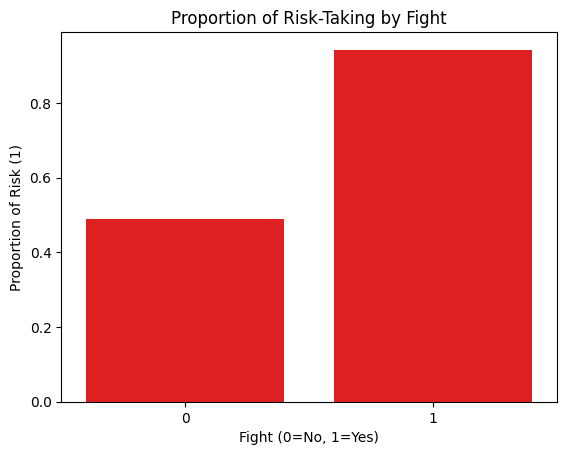

Proportion of Reward by Fight (%):
reward      0      1  Difference(1-0)
fight                                
0       43.65  56.35            12.69
1       97.14   2.86           -94.29
--------------------------------------------------


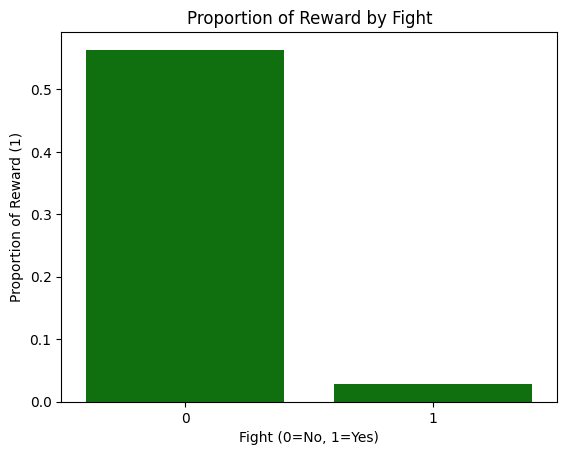

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Load dataset
# ---------------------------------------------------
df = pd.read_csv("Dataset1_clean.csv")

# ---------------------------------------------------
# Descriptive Analysis: Fight vs Risk and Reward
# ---------------------------------------------------

# 1. Fight vs Risk
fight_risk_ct = pd.crosstab(df['fight'], df['risk'], normalize='index')

# Print table with difference
print("Proportion of Risk by Fight (%):")
fight_risk_percent = fight_risk_ct * 100
if 0 in fight_risk_percent.columns and 1 in fight_risk_percent.columns:
    fight_risk_percent['Difference(1-0)'] = fight_risk_percent[1] - fight_risk_percent[0]
print(fight_risk_percent.round(2))
print("-" * 50)

# Plot Fight vs Risk
fight_risk_plot = fight_risk_ct.reset_index()
sns.barplot(x='fight', y=1, data=fight_risk_plot, color='red')
plt.title("Proportion of Risk-Taking by Fight")
plt.xlabel("Fight (0=No, 1=Yes)")
plt.ylabel("Proportion of Risk (1)")
plt.show()

# 2. Fight vs Reward
fight_reward_ct = pd.crosstab(df['fight'], df['reward'], normalize='index')

# Print table with difference
print("Proportion of Reward by Fight (%):")
fight_reward_percent = fight_reward_ct * 100
if 0 in fight_reward_percent.columns and 1 in fight_reward_percent.columns:
    fight_reward_percent['Difference(1-0)'] = fight_reward_percent[1] - fight_reward_percent[0]
print(fight_reward_percent.round(2))
print("-" * 50)

# Plot Fight vs Reward
fight_reward_plot = fight_reward_ct.reset_index()
sns.barplot(x='fight', y=1, data=fight_reward_plot, color='green')
plt.title("Proportion of Reward by Fight")
plt.xlabel("Fight (0=No, 1=Yes)")
plt.ylabel("Proportion of Reward (1)")
plt.show()


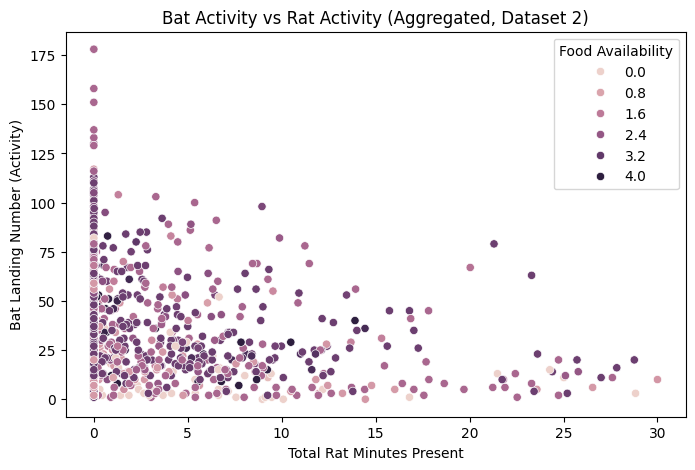

In [48]:
# --- Descriptive analysis on aggregated Dataset2 ---

plt.figure(figsize=(8,5))
sns.scatterplot(x='rat_minutes', y='bat_landing_number', hue='food_availability', data=df2)
plt.title('Bat Activity vs Rat Activity (Aggregated, Dataset 2)')
plt.xlabel('Total Rat Minutes Present')
plt.ylabel('Bat Landing Number (Activity)')
plt.legend(title='Food Availability')
plt.show()

Mean bat activity (rats present): 28.996031746031747
Mean bat activity (rats absent): 36.259179265658744


C:\Users\navod\AppData\Local\Temp\ipykernel_19664\963822752.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df2['rat_present'], y=df2['bat_landing_number'], palette='coolwarm')


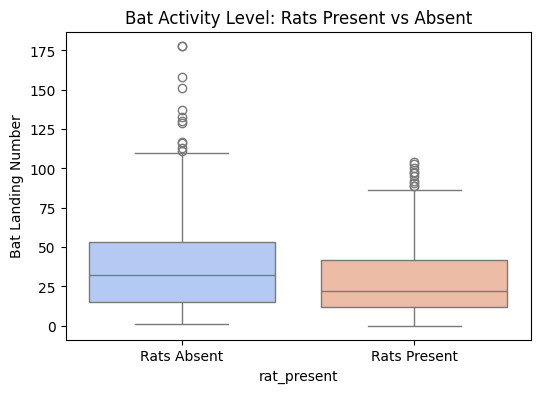

In [49]:
# General Patterns from Dataset 2 (Aggregated)

# Compare bat activity when rats present (rat_arrival_number>0) vs absent
df2['rat_present'] = (df2['rat_arrival_number'] > 0).astype(int)
activity_present = df2[df2['rat_present']==1]['bat_landing_number']
activity_absent = df2[df2['rat_present']==0]['bat_landing_number']

print("Mean bat activity (rats present):", activity_present.mean())
print("Mean bat activity (rats absent):", activity_absent.mean())

plt.figure(figsize=(6,4))
sns.boxplot(x=df2['rat_present'], y=df2['bat_landing_number'], palette='coolwarm')
plt.xticks([0,1], ['Rats Absent', 'Rats Present'])
plt.ylabel('Bat Landing Number')
plt.title('Bat Activity Level: Rats Present vs Absent')
plt.show()


In [50]:
#Inferential Statistics: Null Hypothesis Testing

#Test: Is there a significant difference in bat risk-taking when rats are present?
#We'll use vigilance as a vigilance measure, risk as risk-taking.
risk_taken = df1[df1['risk']==1]['vigilance']
risk_avoided = df1[df1['risk']==0]['vigilance']

#t-test for vigilance between risk/avoid groups
t_stat, p_value = stats.ttest_ind(risk_taken, risk_avoided, equal_var=False)
print(f"T-test for vigilance between risk/avoid groups: t={t_stat:.3f}, p={p_value:.4f}")

#Chi-square for risk-taking proportion by habit type
contingency = pd.crosstab(df1['habit'], df1['risk'])
chi2, p_chi, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-square test for association between habit type and risk-taking: chi2={chi2:.2f}, p={p_chi:.4f}")

#Mann-Whitney U Test for bat activity in Dataset2 (present vs absent)
u_stat, p_u = stats.mannwhitneyu(activity_present, activity_absent, alternative='two-sided')
print(f"Mann-Whitney U test for bat activity (rats present vs absent): U={u_stat}, p={p_u:.4f}")

T-test for vigilance between risk/avoid groups: t=0.494, p=0.6211
Chi-square test for association between habit type and risk-taking: chi2=792.71, p=0.0000
Mann-Whitney U test for bat activity (rats present vs absent): U=294506.0, p=0.0000


In [51]:
#Inferential Analysis

#Null hypothesis: no significant difference in bat risk behaviour when rats are present
#Compare vigilance and hours_after_sunset between risk-taking and avoidance groups

risk_group = df1[df1['risk'] == 1]
avoid_group = df1[df1['risk'] == 0]

# t-test for vigilance
stat, p = ttest_ind(risk_group['vigilance'].dropna(),
                    avoid_group['vigilance'].dropna(),
                    nan_policy='omit')
print(f"T-test for vigilance between Risk and Avoidance groups: stat={stat:.3f}, p={p:.3f}")
if p < 0.05:
    print("Significant difference (reject Ho)")
else:
    print("No significant difference (fail to reject Ho)")

#t-test for hours_after_sunset
stat_h, p_h = ttest_ind(risk_group['hours_after_sunset'].dropna(),
                        avoid_group['hours_after_sunset'].dropna(),
                        nan_policy='omit')
print(f"T-test for hours_after_sunset between Risk and Avoidance groups: stat={stat_h:.3f}, p={p_h:.3f}")
if p_h < 0.05:
    print("Significant difference (reject Ho)")
else:
    print("No significant difference (fail to reject Ho)")

#Split rewards by risk groups
reward_risk = df1[df1['risk'] == 1]['reward']   # rewards for risk-takers
reward_no_risk = df1[df1['risk'] == 0]['reward'] # rewards for avoiders

#Independent Samples T-test
t_stat, p_t = stats.ttest_ind(reward_risk, reward_no_risk, equal_var=False)
print(f"T-test for rewards (risk vs avoid): t={t_stat:.3f}, p={p_t:.4f}")

#Mann-Whitney U Test (non-parametric alternative)
u_stat, p_u = stats.mannwhitneyu(reward_risk, reward_no_risk, alternative='two-sided')
print(f"Mann-Whitney U test for rewards (risk vs avoid): U={u_stat}, p={p_u:.4f}")

print(f"Mann-Whitney U Test for reward between Risk and Reward groups: stat={stat_h:.3f}, p={p_h:.3f}")
if p_h < 0.05:
    print("Significant difference (reject Ho)")
else:
    print("No significant difference (fail to reject Ho)")

#Correlations

corr_vig_risk, p_corr_vig_risk = pearsonr(df1['risk'], df1['vigilance'])
corr_hour_risk, p_corr_hour_risk = pearsonr(df1['risk'], df1['hours_after_sunset'])
corr_reward_risk, p_corr_reward_risk = pearsonr(df1['risk'], df1['reward'])

print(f"Correlation between risk and vigilance: r={corr_vig_risk:.2f}, p={p_corr_vig_risk:.3f}")
print(f"Correlation between risk and hours_after_sunset: r={corr_hour_risk:.2f}, p={p_corr_hour_risk:.3f}")
print(f"Correlation between risk and reward: r={corr_reward_risk:.2f}, p={p_corr_reward_risk:.3f}")

T-test for vigilance between Risk and Avoidance groups: stat=0.494, p=0.621
No significant difference (fail to reject Ho)
T-test for hours_after_sunset between Risk and Avoidance groups: stat=-2.407, p=0.016
Significant difference (reject Ho)
T-test for rewards (risk vs avoid): t=-26.375, p=0.0000
Mann-Whitney U test for rewards (risk vs avoid): U=32576.5, p=0.0000
Mann-Whitney U Test for reward between Risk and Reward groups: stat=-2.407, p=0.016
Significant difference (reject Ho)
Correlation between risk and vigilance: r=0.02, p=0.621
Correlation between risk and hours_after_sunset: r=-0.08, p=0.016
Correlation between risk and reward: r=-0.66, p=0.000
